In [219]:
import MeCab
import ipadic
import re
import sys
import collections
import matplotlib.pyplot as plt
import japanize_matplotlib
import statistics
import math

In [3]:
with open('neko.txt') as f:
    text = f.read()
    
text = text.replace('一', '').replace('\n', '').replace('\u3000', '').split('。')
text = [f'{s}。' for s in text]

tagger = MeCab.Tagger(ipadic.MECAB_ARGS)
result = [tagger.parse(s).split() for s in text]

with open('neko.txt.mecab', mode='w') as f:
    f.writelines([f'{str(l)}\n' for l in result])


In [4]:
print(type(result[0][1]))
print(result[0][1])
print(len(result[0]))

# print(analyser.parse(str))

<class 'str'>
名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
13


In [6]:
with open('neko.txt.mecab') as f:
    s = f.readlines()

sentence = []
sentences = []

for i in s:
    l = eval(i)
    for j in range(len(l)):
        if j % 2 == 1:
            l[j] = l[j].split(',')
            sentence.append({'surface': l[j - 1], 'base': l[j][6], 'pos': l[j][0], 'pos1': l[j][1]})
            
    sentences.append(sentence)
    sentence = []




[{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]


In [38]:
sentences_oneline = sum(sentences, [])

In [33]:
# print(sentences[1][2]['surface'])
print(type(sentences[0][1]))
print(len(sentences[0]))
# print(type(sentences_oneline[0]))

<class 'dict'>
6
<class 'dict'>


In [21]:
# 行ごとにリストを分けて格納
V = []

for i in sentences:
    v = [j['surface'] for j in i if j['pos'] == '動詞']
    V.append(v)


In [39]:
# 行を区別せずに格納
V = []

V = [i['surface'] for i in sentences_oneline if i['pos'] == '動詞']

In [23]:
# 行ごとにリストを分けて格納
V_base = []

for i in sentences:
    v = [j['base'] for j in i if j['pos'] == '動詞']
    V_base.append(v)


In [40]:
# 行を区別せずに格納
V_base = []

V_base = [i['base'] for i in sentences_oneline if i['pos'] == '動詞']

In [41]:
Phrase = []

for i in sentences:
    for j in range(1, len(i) - 1):
        if i[j]['surface'] == 'の' and i[j - 1]['pos'] == '名詞' and i[j + 1]['pos'] == '名詞':
            Phrase.append(i[j - 1]['surface'] + i[j]['surface'] + i[j + 1]['surface'])


In [42]:
length = 0
max_length = 0

tmp_phrase = ''
longest_phrase = ''

for i in sentences_oneline:
    if i['pos'] == '名詞':
        tmp_phrase = tmp_phrase + i['surface']
        length += 1
    else:
        if length > max_length:
            max_length = length
            longest_phrase = tmp_phrase
            tmp_phrase = ''
            
print(longest_phrase)

南無阿弥陀仏南無阿弥陀仏


In [275]:
word = [i['surface'] for i in sentences_oneline]
word_list = list(set(word))
word_count = collections.Counter([i[0] for i in word])
word_list = sorted(word_list, key=lambda x:-word_count[x])
print([i[1] for i in word_count.most_common()])

[9560, 7487, 7344, 7065, 6772, 6673, 6640, 6570, 6094, 5418, 5377, 5339, 4377, 4055, 3539, 3339, 3226, 3225, 3108, 3094, 2349, 2307, 1836, 1824, 1614, 1501, 1423, 1321, 1318, 1159, 1129, 1097, 1012, 1010, 986, 984, 870, 848, 843, 813, 791, 784, 767, 610, 607, 602, 586, 537, 534, 519, 506, 482, 476, 470, 459, 453, 435, 433, 433, 429, 414, 407, 404, 403, 387, 387, 369, 354, 350, 347, 344, 327, 325, 316, 305, 304, 301, 298, 297, 296, 296, 293, 285, 282, 282, 277, 270, 257, 255, 245, 243, 241, 235, 232, 221, 218, 216, 216, 214, 214, 212, 208, 207, 206, 205, 201, 198, 197, 197, 195, 195, 194, 194, 188, 187, 184, 178, 177, 172, 172, 170, 168, 167, 167, 165, 165, 165, 163, 163, 160, 159, 158, 155, 155, 154, 151, 147, 147, 145, 141, 141, 140, 139, 139, 137, 137, 136, 135, 135, 134, 133, 132, 132, 132, 131, 131, 131, 129, 128, 128, 127, 127, 127, 126, 125, 125, 124, 122, 121, 120, 120, 115, 114, 114, 113, 113, 112, 111, 110, 109, 108, 108, 108, 108, 107, 107, 107, 104, 104, 104, 103, 103, 103, 

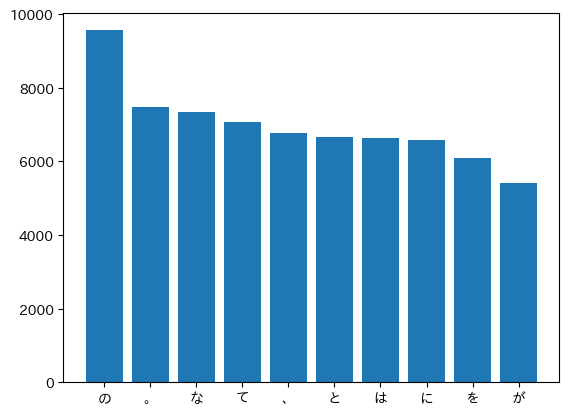

In [90]:
def plot_bar(data, labels):
    plt.bar(list(range(1, len(data) + 1)), list(map(int, data)), tick_label=labels)
    plt.show()
    

plot_bar([word_count[word_list[i]] for i in range(10)], [word_list[i] for i in range(10)])

In [74]:
print(type(list(range(5))))
print(type(word_list[0]))
print( plt.rcParams['font.family'] )
print( plt.rcParams['font.sans-serif'] )

print(type(sentences_oneline[0]))
print(len(sentences_oneline))

<class 'list'>
<class 'str'>
['IPAexGothic']
['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
<class 'dict'>
205415


In [271]:
# 全ての単語を確認
co_occurrence = collections.Counter()

for i, w in enumerate(sentences_oneline):
    if w['surface'] == '猫':
        if i > 0:
            co_occurrence[sentences_oneline[i - 1]['surface']] += 1
        if i < len(sentences_oneline) - 1:
            co_occurrence[sentences_oneline[i + 1]['surface']] += 1
            
print(co_occurrence)

Counter({'の': 75, 'は': 36, 'で': 28, 'に': 28, 'が': 27, 'と': 27, '、': 25, '。': 23, 'だ': 11, 'を': 10, 'も': 9, 'より': 8, 'この': 8, '等': 7, 'じゃ': 7, 'だって': 7, 'など': 7, 'な': 7, 'として': 5, 'いる': 5, 'から': 5, 'ながら': 4, '属': 4, 'なら': 3, '——': 3, '吾輩': 3, 'その': 3, '雄': 3, '誉': 3, 'しかし': 3, 'ば': 3, 'たら': 3, 'た': 2, '族': 2, '黒': 2, '中': 2, 'だけ': 2, 'いくら': 2, 'へ': 2, 'くらい': 2, '何だか': 2, '南無': 2, 'たる': 2, 'にとって': 2, 'です': 2, '庸': 2, 'どうしても': 2, 'その後': 1, '小': 1, '永く': 1, '盲': 1, '大きな': 1, '？': 1, '乱暴': 1, 'やすい': 1, 'って': 1, 'せめて': 1, '々': 1, 'どの': 1, 'やはり': 1, 'や': 1, 'か': 1, 'かえって': 1, 'あら': 1, 'ねえ': 1, '憎らしい': 1, 'だっ': 1, 'らしく': 1, '薄ぎたない': 1, '」': 1, 'それから': 1, '可愛らしい': 1, 'なに': 1, '無性': 1, 'こう': 1, 'ぬ': 1, 'する': 1, '愚': 1, '決して': 1, 'まします': 1, '大明神': 1, 'それだけ': 1, 'に対する': 1, '到底': 1, '雌': 1, 'または': 1, '図々しい': 1, '食い': 1, '「': 1, '仮令': 1, '鍋': 1, 'しかしながら': 1, '混成': 1, '旅団': 1, '賢しゅう': 1, 'よほど': 1, 'すこぶる': 1, 'でも': 1, '児': 1, '疋': 1, '輩': 1, 'ただ': 1, 'なんぞ': 1, '的': 1, '美': 1, '霊': 1, 'ごとき': 1, 'とうてい':

In [87]:
# 名詞のみを確認
co_occurrence = collections.Counter()

for i, w in enumerate(sentences_oneline):
    if w['surface'] == '猫':
        if i > 0 and sentences_oneline[i - 1]['pos'] == '名詞':
            co_occurrence[sentences_oneline[i - 1]['surface']] += 1
        if i < len(sentences_oneline) - 1 and sentences_oneline[i + 1]['pos'] == '名詞':
            co_occurrence[sentences_oneline[i + 1]['surface']] += 1
            
            

Counter({'等': 7, '属': 4, '吾輩': 3, '誉': 3, '族': 2, '黒': 2, '中': 2, '雄': 2, '庸': 2, 'その後': 1, '盲': 1, '乱暴': 1, 'あら': 1, 'なに': 1, '無性': 1, '愚': 1, '大明神': 1, '雌': 1, '食い': 1, '鍋': 1, '混成': 1, '旅団': 1, '児': 1, '疋': 1, '輩': 1, '的': 1, '美': 1, '霊': 1, '共': 1})
0
<class 'list'>
属


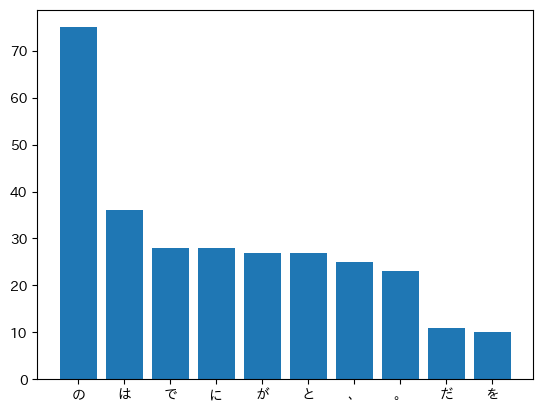

In [93]:
data = [i[1] for i in co_occurrence.most_common()[:10:]]
labels = [i[0] for i in co_occurrence.most_common()[:10:]]
plot_bar(data, labels)

[('の', 9560), ('。', 7487), ('な', 7344), ('て', 7065), ('、', 6772), ('と', 6673), ('は', 6640), ('に', 6570), ('を', 6094), ('が', 5418), ('た', 5377), ('で', 5339), ('か', 4377), ('も', 4055), ('あ', 3539), ('だ', 3339), ('「', 3226), ('」', 3225), ('し', 3108), ('い', 3094), ('ま', 2349), ('そ', 2307), ('よ', 1836), ('こ', 1824), ('ん', 1614), ('す', 1501), ('云', 1423), ('事', 1321), ('う', 1318), ('さ', 1159), ('見', 1129), ('へ', 1097), ('君', 1012), ('出', 1010), ('人', 986), ('主', 984), ('ば', 870), ('御', 848), ('や', 843), ('ね', 813), ('大', 791), ('何', 784), ('ど', 767), ('つ', 610), ('く', 607), ('思', 602), ('お', 586), ('時', 537), ('吾', 534), ('じ', 519), ('上', 506), ('来', 482), ('れ', 476), ('今', 470), ('ご', 459), ('ち', 453), ('気', 435), ('行', 433), ('…', 433), ('自', 429), ('先', 414), ('知', 407), ('三', 404), ('聞', 403), ('方', 387), ('迷', 387), ('わ', 369), ('ず', 354), ('せ', 350), ('二', 347), ('無', 344), ('—', 327), ('寒', 325), ('っ', 316), ('え', 305), ('分', 304), ('少', 301), ('ぬ', 298), ('心', 297), ('中', 296), ('顔',

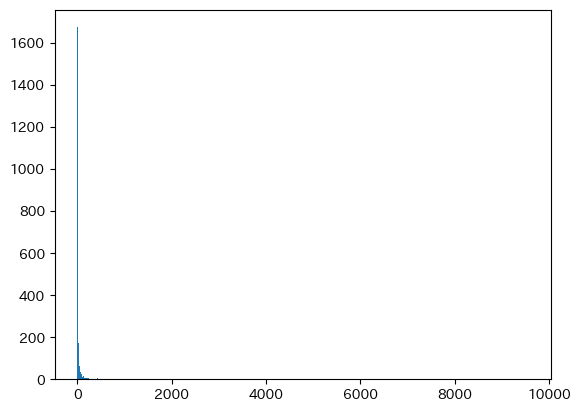

In [278]:
print(word_count.most_common())
print(type(word_count.most_common()[0]))
print([i[1] for i in word_count.most_common()])

plt.hist([i[1] for i in word_count.most_common()], bins=900)
plt.show()

[9560, 7487, 7344, 7065, 6772, 6673, 6640, 6570, 6094, 5418, 5377, 5339, 4377, 4055, 3539, 3339, 3226, 3225, 3108, 3094, 2349, 2307, 1836, 1824, 1614, 1501, 1423, 1321, 1318, 1159, 1129, 1097, 1012, 1010, 986, 984, 870, 848, 843, 813, 791, 784, 767, 610, 607, 602, 586, 537, 534, 519, 506, 482, 476, 470, 459, 453, 435, 433, 433, 429, 414, 407, 404, 403, 387, 387, 369, 354, 350, 347, 344, 327, 325, 316, 305, 304, 301, 298, 297, 296, 296, 293, 285, 282, 282, 277, 270, 257, 255, 245, 243, 241, 235, 232, 221, 218, 216, 216, 214, 214, 212, 208, 207, 206, 205, 201, 198, 197, 197, 195, 195, 194, 194, 188, 187, 184, 178, 177, 172, 172, 170, 168, 167, 167, 165, 165, 165, 163, 163, 160, 159, 158, 155, 155, 154, 151, 147, 147, 145, 141, 141, 140, 139, 139, 137, 137, 136, 135, 135, 134, 133, 132, 132, 132, 131, 131, 131, 129, 128, 128, 127, 127, 127, 126, 125, 125, 124, 122, 121, 120, 120, 115, 114, 114, 113, 113, 112, 111, 110, 109, 108, 108, 108, 108, 107, 107, 107, 104, 104, 104, 103, 103, 103, 

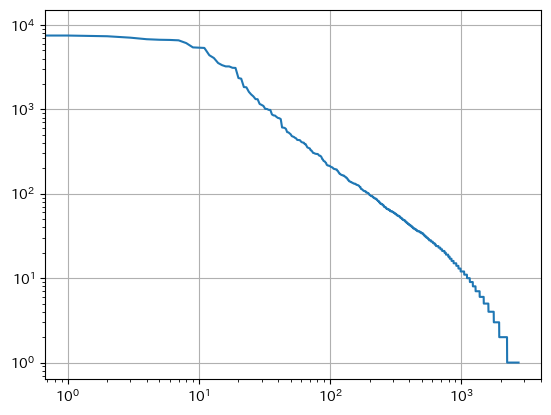

In [277]:
y_data = [i[1] for i in word_count.most_common()]
print(y_data)
print(len(y_data))

plt.plot(range(len(y_data)), [i for i in y_data])
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.grid(True)
plt.show()

In [162]:
l = [1, 2, 3, 6, 7, 10]

for i in range(l[-1]):
    j = 0
    while l[i] != i + 1:
        l.insert(i, l[i] - 1)
        j += 1
        print(f'insert:{l[i]}')
    print(l[i + j])
    i += j
    
print(l)
print(len(l))

1
2
3
insert:5
insert:4
6
5
6
7
insert:9
insert:8
10
9
10
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10
